## **Applying XGBoost algorithm on the Boston housing dataset to predict the median value. Do the usual train/test split and then compare the result with the result of applying linear regression. You can use a suitable metric like RMSE.**

In [50]:
import numpy as np
from xgboost import XGBRegressor, plot_tree
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [51]:
# Load the Boston Housing dataset
housing_dataset = pd.read_excel("boston housing.xls")

housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [81]:
housing_dataset.shape

(506, 14)

In [82]:
housing_dataset.describe() #Statistical inference of the dataset
#Includes count, mean of each column, standard deviation and percentage distribution

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [52]:
#Find number of null value in the dataset
housing_dataset.isnull().sum()

# None of the columns have any null value, hence data preprocessing w.r.t null not required

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

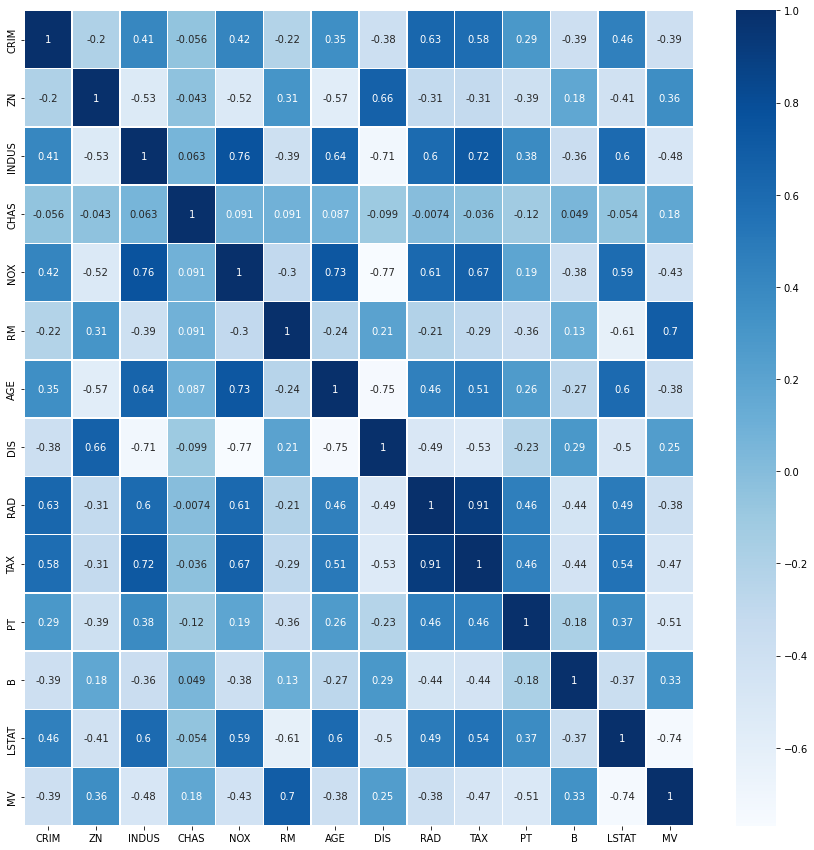

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))     
ax = sns.heatmap(housing_dataset.corr(), annot=True, linewidths=.5, ax=ax, cmap = 'Blues')

In [53]:
# Separate the target variable from the features
y = housing_dataset['MV']
X = housing_dataset.drop(['MV'], axis=1)

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
# Fit an XGBoost regressor to the training data
xgb_model = XGBRegressor(max_depth=10)
xgb_model.fit(X_train, y_train)

[23:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=10)

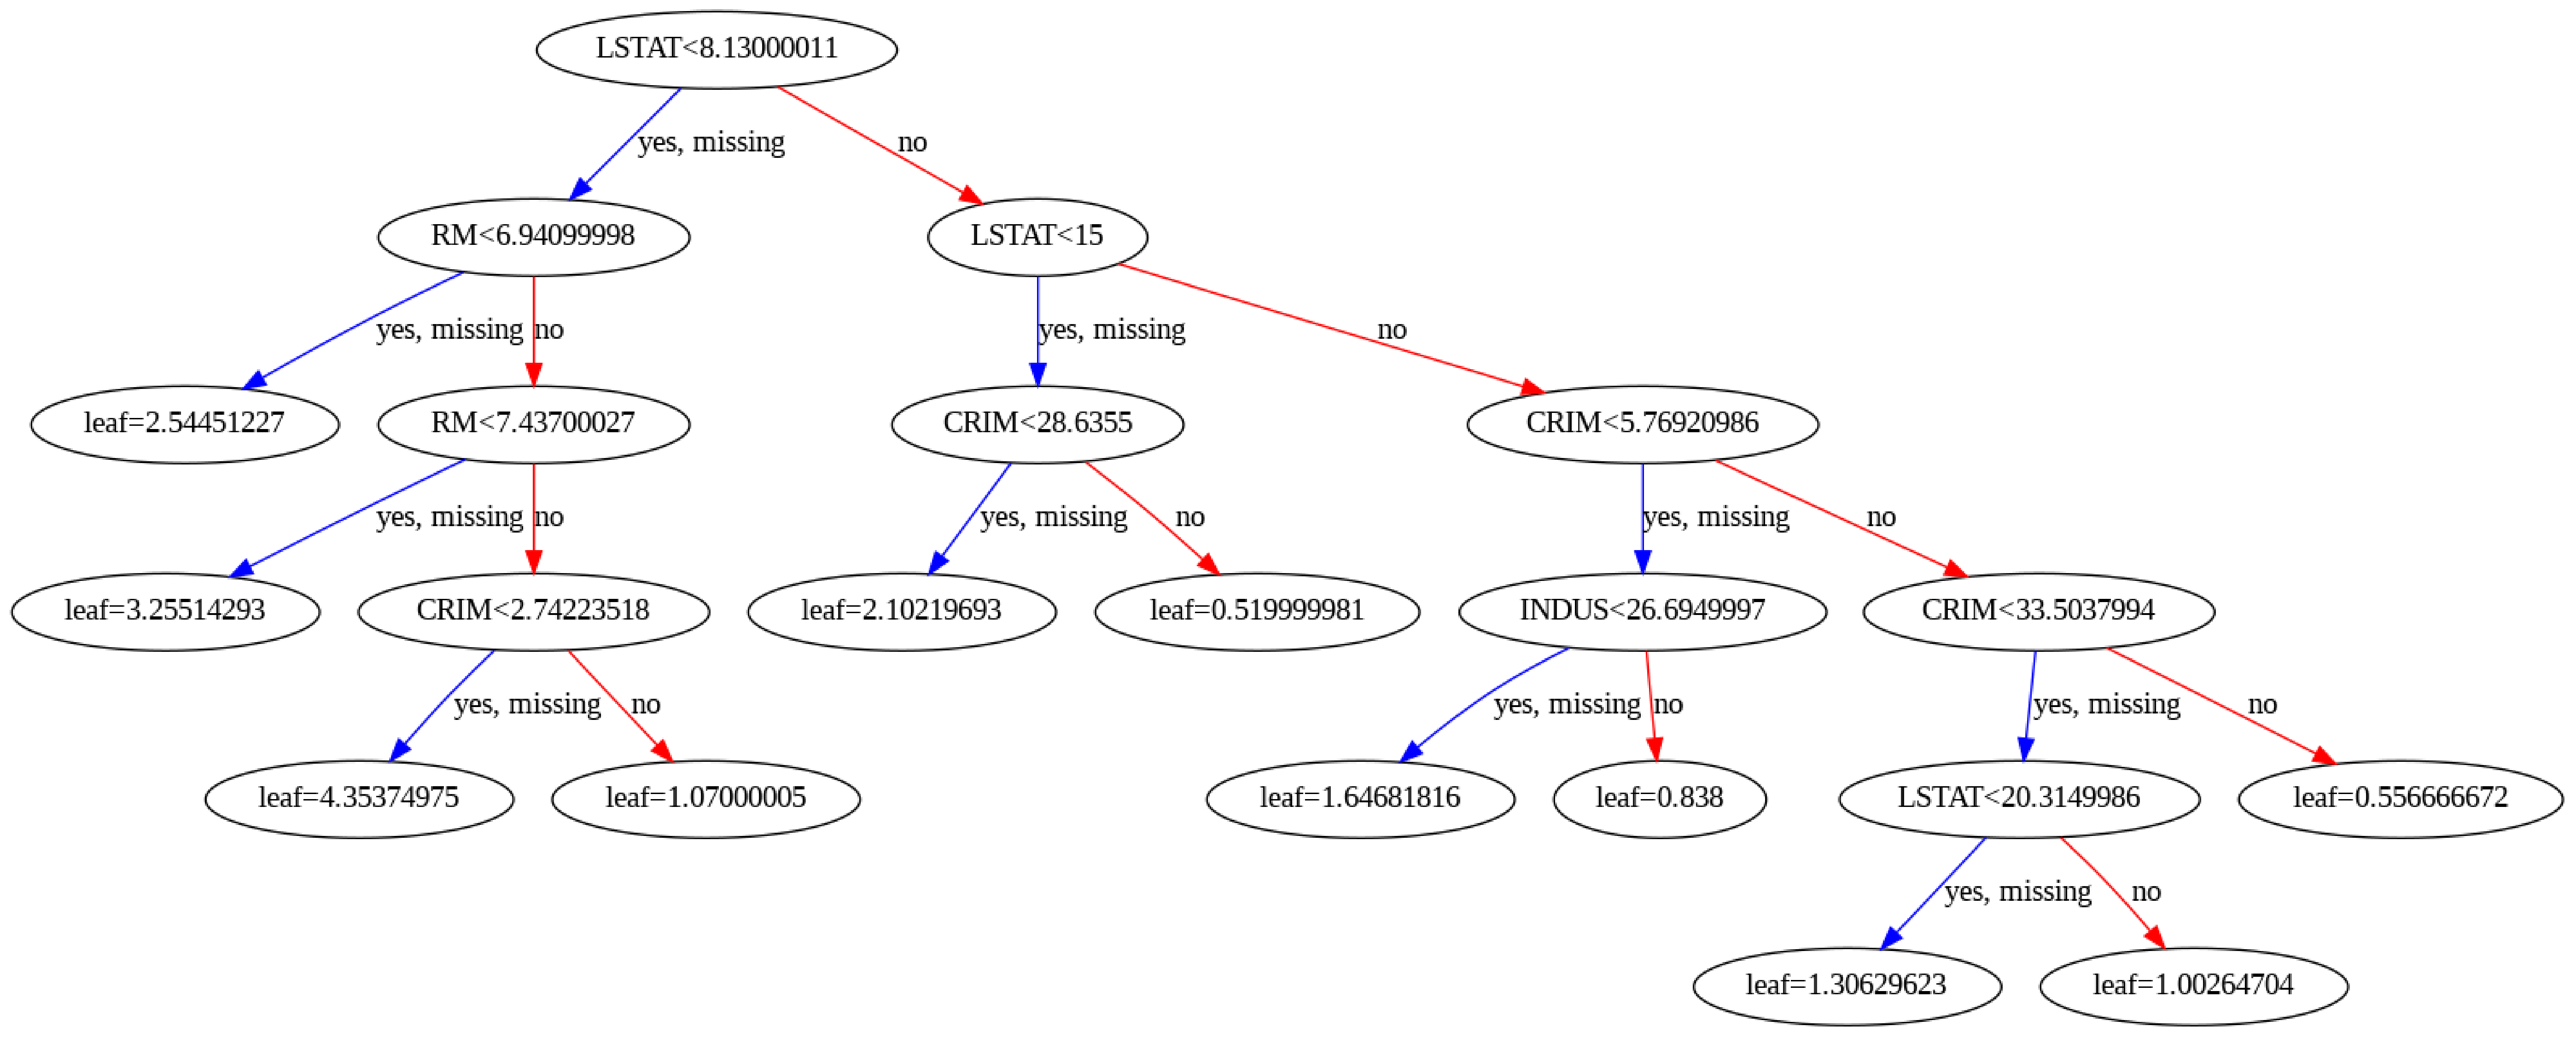

In [56]:
# Make predictions on the test data using the XGBoost model
xgb_pred = xgb_model.predict(X_test)

# Plot the first tree of the XGBoost model
# plt.figure(figsize=(20, 15)) # set the size of the figure
plt.rcParams['figure.figsize'] = [100, 100]
plot_tree(xgb_model)
plt.show()

In [57]:
# Calculate the RMSE of the XGBoost model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

# Print the RMSE of the XGBoost model
print("RMSE of XGBoost Regressor:", xgb_rmse)

RMSE of XGBoost Regressor: 4.5829273861479205


In [58]:
# Fit a linear regression model to the training data
linear_model = linear_model.LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test data using the linear regression model
linear_pred = linear_model.predict(X_test)

# Calculate the RMSE of the linear regression model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))

# Print the RMSE of the linear regression model
print("RMSE of Linear Regression:", linear_rmse)

RMSE of Linear Regression: 5.783509268088992


In [59]:
# Compare the RMSEs of the two models
if xgb_rmse < linear_rmse:
    print("XGBoost model performs better with lower RMSE.")
else:
    print("Linear regression model performs better with lower RMSE.")

XGBoost model performs better with lower RMSE.


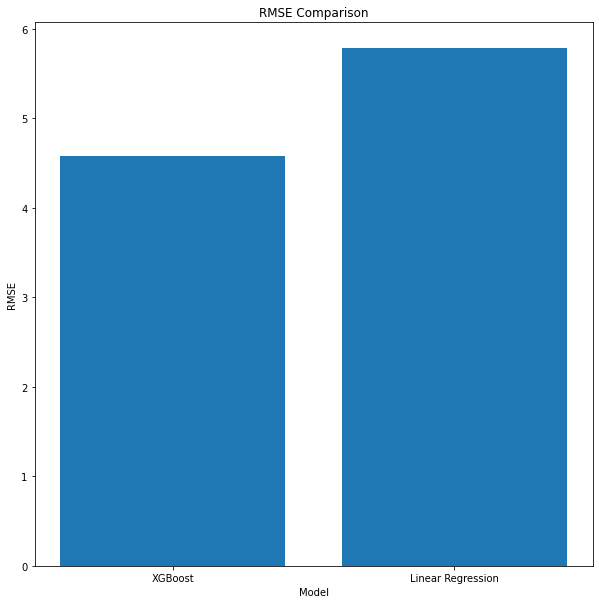

In [106]:
# plot RMSE values
plt.bar(['XGBoost', 'Linear Regression'], [xgb_rmse, linear_rmse])
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.rcParams['figure.figsize'] = [1,1]
plt.show()

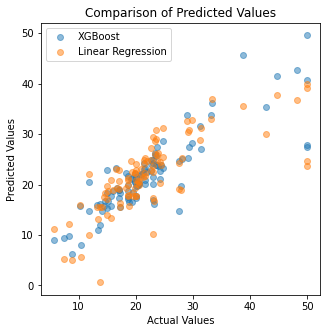

In [78]:
# Create a scatter plot of the predicted values vs. the actual values
plt.scatter(y_test, xgb_pred, label='XGBoost', alpha=0.5)
plt.scatter(y_test, linear_pred, label='Linear Regression', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values')
plt.legend()
plt.rcParams['figure.figsize'] = [1,1]
plt.show()

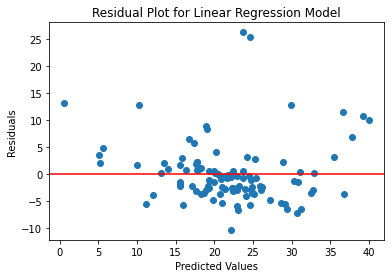

In [9]:
# Calculate the residuals for the XGBoost regression model
xgb_resid = y_test - xgb_pred

# Plot the residual plot for the linear regression model
plt.scatter(xgb_pred, xgb_resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for XGBoost Regression Model")
plt.show()

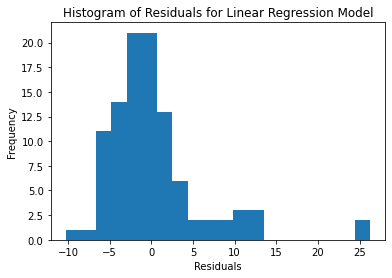

In [10]:
# Calculate the residuals for the linear regression model
xgb_resid = y_test - xgb_pred

# Plot the residual plot for the linear regression model
plt.scatter(xgb_pred, xgb_resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for XGBoost Regression Model")
plt.show()

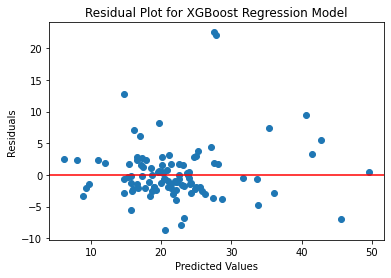

In [11]:
# Calculate the residuals for the linear regression model
xgb_resid = y_test - xgb_pred

# Plot the residual plot for the linear regression model
plt.scatter(xgb_pred, xgb_resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for XGBoost Regression Model")
plt.show()

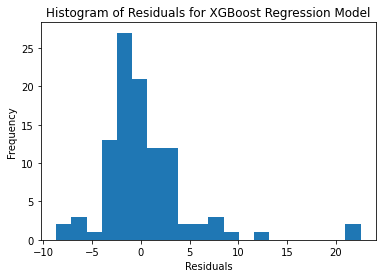

In [12]:
# Calculate the residuals for the linear regression model
xgb_resid = y_test - xgb_pred

# Plot a histogram of the residuals
plt.hist(xgb_resid, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for XGBoost Regression Model")
plt.show()